In [29]:
#125* 60* 8* 19 for 8 people and all 19 activity
#training + testing contains 1140000 rows and 45 columns. 45 columns are features


# x_train is feature dataset, y_train consists of class labels
#preparing training data (first 6 users data is used)

x_train = []
y_train = []

for k in range(1, 10):
    path2 = "data/a0" + str(k) + "/p"
    for j in range(1, 7):
        path1 = path2 + str(j) + "/s"
        for i in range(1, 10):
            path = path1 + "0" + str(i) + ".txt"
            with open(path) as f:
                lines = f.readlines()
                for line in lines:
                    arr = line.split(",")
                    arr = [float(measurement) for measurement in arr]
                    x_train.append(arr)
                    y_train.append(k)     #end numeric appended is activity label

        for i in range(10, 61):
            path = path1 + str(i) + ".txt"
            with open(path) as f:
                lines = f.readlines()
                for line in lines:
                    arr = line.split(",")
                    arr = [float(measurement) for measurement in arr]
                    x_train.append(arr)
                    y_train.append(k)
                    
for k in range(10, 20):
    path2 = "data/a" + str(k) + "/p"
    for j in range(1, 7):
        path1 = path2 + str(j) + "/s"
        for i in range(1, 10):
            path = path1 + "0" + str(i) + ".txt"
            with open(path) as f:
                lines = f.readlines()
                for line in lines:
                    arr = line.split(",")
                    arr = [float(measurement) for measurement in arr]
                    x_train.append(arr)
                    y_train.append(k)

        for i in range(10, 61):
            path = path1 + str(i) + ".txt"
            with open(path) as f:
                lines = f.readlines()
                for line in lines:
                    arr = line.split(",")
                    arr = [float(measurement) for measurement in arr]
                    x_train.append(arr)
                    y_train.append(k)

In [30]:
# x_test is feature dataset, y_test  consists of class labels
#preparing testing data (last 2 users data is used)

x_test = []
y_test = []

for k in range(1, 10):
    path2 = "data/a0" + str(k) + "/p"
    for j in range(7, 9):
        path1 = path2 + str(j) + "/s"
        for i in range(1, 10):
            path = path1 + "0" + str(i) + ".txt"
            with open(path) as f:
                lines = f.readlines()
                for line in lines:
                    arr = line.split(",")
                    arr = [float(measurement) for measurement in arr]
                    x_test.append(arr)
                    y_test.append(k)     #end numeric appended is activity label

        for i in range(10, 61):
            path = path1 + str(i) + ".txt"
            with open(path) as f:
                lines = f.readlines()
                for line in lines:
                    arr = line.split(",")
                    arr = [float(measurement) for measurement in arr]
                    x_test.append(arr)
                    y_test.append(k)
                    
for k in range(10, 20):
    path2 = "data/a" + str(k) + "/p"
    for j in range(7, 9):
        path1 = path2 + str(j) + "/s"
        for i in range(1, 10):
            path = path1 + "0" + str(i) + ".txt"
            with open(path) as f:
                lines = f.readlines()
                for line in lines:
                    arr = line.split(",")
                    arr = [float(measurement) for measurement in arr]
                    x_test.append(arr)
                    y_test.append(k)

        for i in range(10, 61):
            path = path1 + str(i) + ".txt"
            with open(path) as f:
                lines = f.readlines()
                for line in lines:
                    arr = line.split(",")
                    arr = [float(measurement) for measurement in arr]
                    x_test.append(arr)
                    y_test.append(k)

In [31]:
#importing the modules necessary
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import numpy as np

In [32]:
#standardizing the data improves the accuracy of model
standardScaler = StandardScaler()
standardScaler.fit(x_train) 
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)

# scaler = MinMaxScaler()
# scaler.fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

#using dimensional reduction results in poor accuracy, so we did not use it
#pca
# pca = PCA(n_components = 20)
# pca.fit(x_train)
# x_train = pca.transform(x_train)
# x_test = pca.transform(x_test)

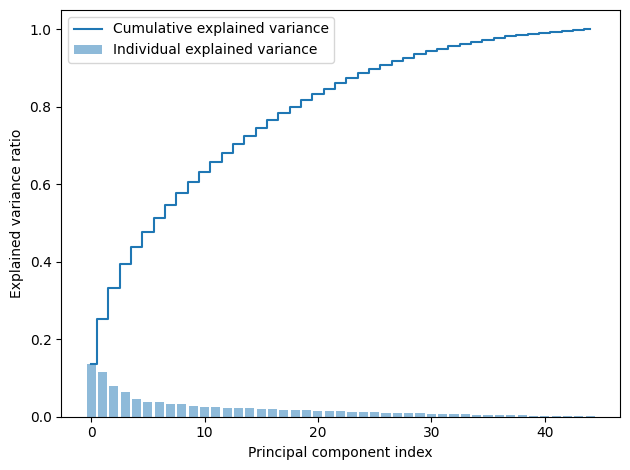

In [33]:
#using pca's explained_variance_ratio to see how many features are important

pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(x_train)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [34]:
# #use SelectKBest to select the best features, i.e. feature selection
# kbest = SelectKBest(chi2, k=45)

# # fit the training dataset for the model
# kbest.fit(x_train, y_train)

# # apply transform to training dataset
# x_train = kbest.transform(x_train)

# # apply transform to testing dataset
# x_test = kbest.transform(x_test)

In [35]:
# classifier = RandomForestClassifier(n_estimators=100)
# classifier.fit(x_train, y_train)
# y_predicted = classifier.predict(x_test)

#using KNN as the classification model

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)

y_predicted = knn.predict(x_test)

In [36]:
labels = ['sitting', 'standing', 'lying on back side', 'lying on right side', 'ascending stairs','descending stairs',
          'standing in an elevator still', 'moving around in an elevator', 'walking in a parking lot',
         'walking on a treadmill with a speed of 4 km/h in flat position', 'walking on a treadmill with a speed of 4 km/h in 15 deg inclined position',
         'running on a treadmill with a speed of 8 km/h', 'exercising on a stepper',
         'exercising on a cross trainer', 'cycling on an exercise bike in horizontal position', 'cycling on an exercise bike in vertical position',
         'rowing', 'jumping', 'playing basketball']

print(classification_report(y_test, y_predicted, target_names = labels))

                                                                           precision    recall  f1-score   support

                                                                  sitting       1.00      0.97      0.98     15000
                                                                 standing       0.99      0.50      0.66     15000
                                                       lying on back side       1.00      1.00      1.00     15000
                                                      lying on right side       1.00      1.00      1.00     15000
                                                         ascending stairs       0.91      0.98      0.94     15000
                                                        descending stairs       0.83      0.91      0.87     15000
                                            standing in an elevator still       0.76      0.40      0.53     15000
                                             moving around in an elevator      

In [38]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_predicted))

0.8239122807017544


In [10]:
#Accuracy scores of different models and parameters
#new split of data (6 users for training and 2 users for testing)

#accuracy = 0.6988877192982457 with raw data and KNN
#accuracy = 0.6802350877192982 with raw data and RandomForest

#using KNN and MinMaxScalar,
#accuracy = 0.7145298245614035
##using KNN and MinMaxScalar, and using SelectKBest k = 20, 
#accuracy = 0.65 

#using RandomForest and MinMaxScalar, SelectKBest where k = 20,
#accuracy = 0.6396140350877193
#accuracy =  0.6758140350877193 with k = 33
#accuracy = 0.686740350877193  with k = 45

#using RandomForest and StandardScalar, SelectKBest where k = 20,0.6871894736842106